# Analyse BlueSeis BSPF Event Analysis

With pressure sensor parascientific and new sensor 

In [1]:
import os 
import obspy as obs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from andbro__savefig import __savefig

In [2]:
def __request_data(seed, tbeg, tend):

    from obspy.clients.fdsn import Client

    client = Client("IRIS")

    net, sta, loc, cha = seed.split(".")

    try:
        inventory = client.get_stations(network=net, 
                                         station=sta,
                                         starttime=tbeg-60,
                                         endtime=tend+60,
                                         level="response",
                                         )
    except:
        print("Failed to load inventory!")
        inventory = None
        
    try:
        waveform = client.get_waveforms(network=net,
                                       station=sta,
                                       location=loc,
                                       channel=cha, 
                                       starttime=tbeg-60,
                                       endtime=tend+60,
                                       )

    except:
        print("Failed to load waveforms!")
        waveform = None
    
    return waveform, inventory

## Configurations

In [3]:
workdir = "/home/andbro/Documents/ROMY/BSPF"

In [4]:
config = {}

In [5]:
## blueSeis sensor
config['seed_blueseis'] = "PY.BSPF..HJ*"

## Trillium 240 next to BlueSeis on Pier
config['seed_seismometer'] = "II.PFO.10.BH*" 
# config['seed_seismometer'] = "PY.BSPF..HH*" 

## BSPF coordinates
config['BSPF_lon'] = -116.455439
config['BSPF_lat'] = 33.610643


## ..., California M3.2 -> good
config['tbeg'] = obs.UTCDateTime("2023-01-09 19:42:56")
config['tend'] = config['tbeg']+20
config['fmin'], config['fmax'] = 0.5, 10.0
config['magnitude'] = 3.2

config['title'] = f"Borrego Springs, Ca | {config['tbeg'].date} {str(config['tbeg'].time)[:5]} UTC | M{config['magnitude']}"

## Event Info

In [6]:
## Peru / Ecuador 
# config['tbeg'] = obs.UTCDateTime("2022-10-05 10:26")
# config['tend'] = obs.UTCDateTime("2022-10-05 10:40")

## Near PFO  - !! with XX location code
# config['tbeg'] = obs.UTCDateTime("2022-10-05 15:39:32")
# config['tend'] = obs.UTCDateTime("2022-10-05 15:39:45")

## ---- North Pacific Ocean -> No
# config['title'] = "North Pacific Ocean | 2022-10-25 18:40 UTC | M5.8"
# config['tbeg'] = obs.UTCDateTime("2022-11-02 04:53:00")
# config['tend'] = obs.UTCDateTime("2022-11-02 05:53:00")
# config['fmin'], config['fmax'] = 0.1, 0.5

## ---- Culf of California M5.1 -> No
# config['title'] = "Central California | 2022-10-25 18:40 UTC | M5.1"
# config['tbeg'] = obs.UTCDateTime("2022-10-25 18:40:00")
# config['tend'] = obs.UTCDateTime("2022-10-25 19:00:00")
# config['fmin'], config['fmax'] = 0.1, 0.5

## ---- Local M3.8-> No
# config['title'] = "Local | 2022-10-11 06:19 UTC | M3.8"
# config['tbeg'] = obs.UTCDateTime("2022-10-11 06:19:00")
# config['tend'] = obs.UTCDateTime("2022-10-11 06:30:00")
# config['fmin'], config['fmax'] = 0.5, 15.0


## Gulf of California M6.2 -> somewhat
# config['title'] = "Gullf of California | 2022-11-04 10:02 UTC | M6.2"
# config['tbeg'] = obs.UTCDateTime("2022-11-04 10:02")
# config['tend'] = obs.UTCDateTime("2022-11-04 10:15")
# config['fmin'], config['fmax'] = 0.025, 0.2


## Las Brisas, Mexico M6.4 -> alright
# config['title'] = "Las Brisas, Mexico | 2022-11-22 16:39 UTC | M6.2"
# config['eventtime'] = obs.UTCDateTime("2022-11-22 16:39")
# config['tbeg'] = obs.UTCDateTime("2022-11-22 16:32")
# config['tend'] = obs.UTCDateTime("2022-11-22 17:00")
# config['fmin'], config['fmax'] = 0.01, 0.5

## Borrego Springs, California M4.2 -> good
config['title'] = "Borrego Springs, Ca | 2022-12-31 12:12:26 UTC | M4.2"
config['eventtime'] = obs.UTCDateTime("2022-12-31 12:12:26")
config['tbeg'] = obs.UTCDateTime("2022-12-31 12:12:25")
config['tend'] = obs.UTCDateTime("2022-12-31 12:13")
config['fmin'], config['fmax'] = 0.01, 10.0

## ..., California M3.2 -> good
# config['tbeg'] = obs.UTCDateTime("2023-01-09 19:42:56")
# config['tend'] = config['tbeg']+20
# config['fmin'], config['fmax'] = 0.5, 10.0
# config['title'] = f"Borrego Springs, Ca | {config['tbeg'].date} {str(config['tbeg'].time)[:5]} UTC | M3.2"


## Load Data

In [7]:
# ## read data stream using obspy routine
# st0 = obs.read(config['datapath'], 
#                format="MSEED",
#                startime=config['tbeg']-60,
#                endtime=config['tend']+60)


# ## merge traces that might be split due to data gaps or overlaps
# st0.merge(fill_value="interpolate")

# ## cut to event
# st0.trim(config['tbeg'], config['tend'])

# ## remove mean
# st0.detrend("demean")

# ## apply taper
# st0.taper(0.1)

# ## renove sensitivity
# st0.remove_sensitivity(config['inventory'])

# ## show all traces in data stream
# print(st0)

# st0.plot(equal_scale=False);

In [8]:
py_bspf0, py_bspf_inv = __request_data(config['seed_blueseis'], config['tbeg'], config['tend'])

3 Trace(s) in Stream:
PY.BSPF..HJE | 2022-12-31T12:12:25.003700Z - 2022-12-31T12:13:00.003700Z | 40.0 Hz, 1401 samples
PY.BSPF..HJN | 2022-12-31T12:12:25.003700Z - 2022-12-31T12:13:00.003700Z | 40.0 Hz, 1401 samples
PY.BSPF..HJZ | 2022-12-31T12:12:25.003700Z - 2022-12-31T12:13:00.003700Z | 40.0 Hz, 1401 samples


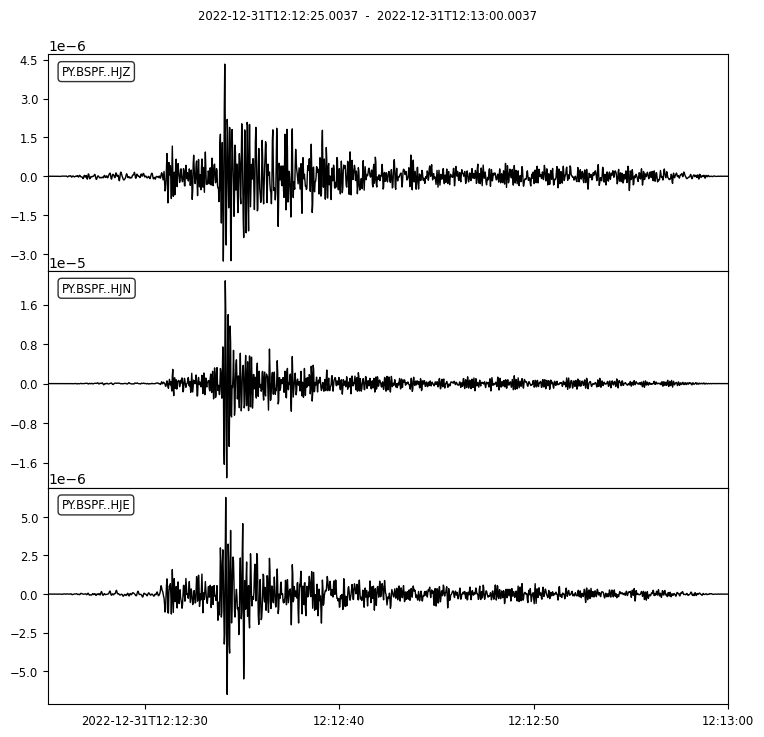

In [9]:
py_bspf = py_bspf0.copy()

## merge traces that might be split due to data gaps or overlaps
py_bspf.merge(fill_value="interpolate")

## renove sensitivity
py_bspf.remove_sensitivity(py_bspf_inv)

## resample to 40 Hz
py_bspf.resample(40)

## cut to event
py_bspf.trim(config['tbeg'], config['tend'])

## remove mean
py_bspf.detrend("demean")

## apply taper
py_bspf.taper(0.1)

## bandpass filter
py_bspf.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

## adjust channel names
for tr in py_bspf:
    if tr.stats.channel[-1] == "1":
        tr.stats.channel = str(tr.stats.channel).replace("1","E")
    if tr.stats.channel[-1] == "2":
        tr.stats.channel = str(tr.stats.channel).replace("2","N")        
    if tr.stats.channel[-1] == "3":
        tr.stats.channel = str(tr.stats.channel).replace("3","Z")

## show all traces in data stream
print(py_bspf)

py_bspf.plot(equal_scale=False);

## Compare with Seismometer

In [10]:
ii_pfo0, ii_pfo_inv = __request_data(config['seed_seismometer'], config['tbeg'], config['tend'])

3 Trace(s) in Stream:
II.PFO.10.BHN | 2022-12-31T12:12:24.994538Z - 2022-12-31T12:12:59.994538Z | 40.0 Hz, 1401 samples
II.PFO.10.BHE | 2022-12-31T12:12:24.994538Z - 2022-12-31T12:12:59.994538Z | 40.0 Hz, 1401 samples
II.PFO.10.BHZ | 2022-12-31T12:12:24.994538Z - 2022-12-31T12:12:59.994538Z | 40.0 Hz, 1401 samples


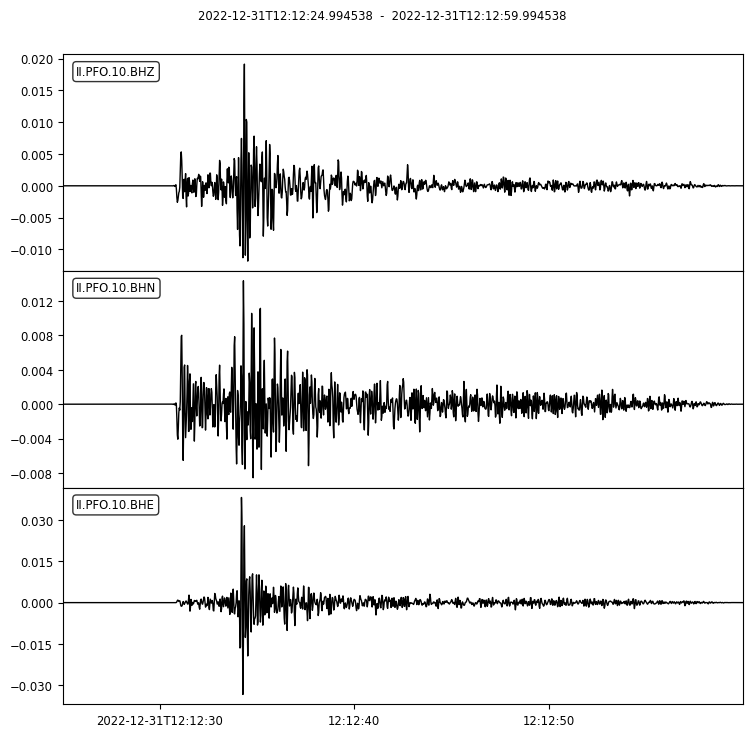

In [11]:
ii_pfo = ii_pfo0.copy()

pre_filt = [0.005, 0.01, 19, 20]

## cut properly
ii_pfo.trim(config['tbeg'], config['tend'])

## demean
ii_pfo.detrend("demean")

## remove response
ii_pfo.remove_response(inventory=ii_pfo_inv, output="ACC",plot=False)

## taper 
ii_pfo.taper(0.1)

## bandpass
ii_pfo.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

## adjust channel names
for tr in ii_pfo:
    if tr.stats.channel[-1] == "1":
        tr.stats.channel = str(tr.stats.channel).replace("1","N")
    if tr.stats.channel[-1] == "2":
        tr.stats.channel = str(tr.stats.channel).replace("2","E")
        
print(ii_pfo)
ii_pfo.plot(equal_scale=False);

### Join Data

In [12]:
st_new = py_bspf.copy()
st_new += ii_pfo

### Plotting

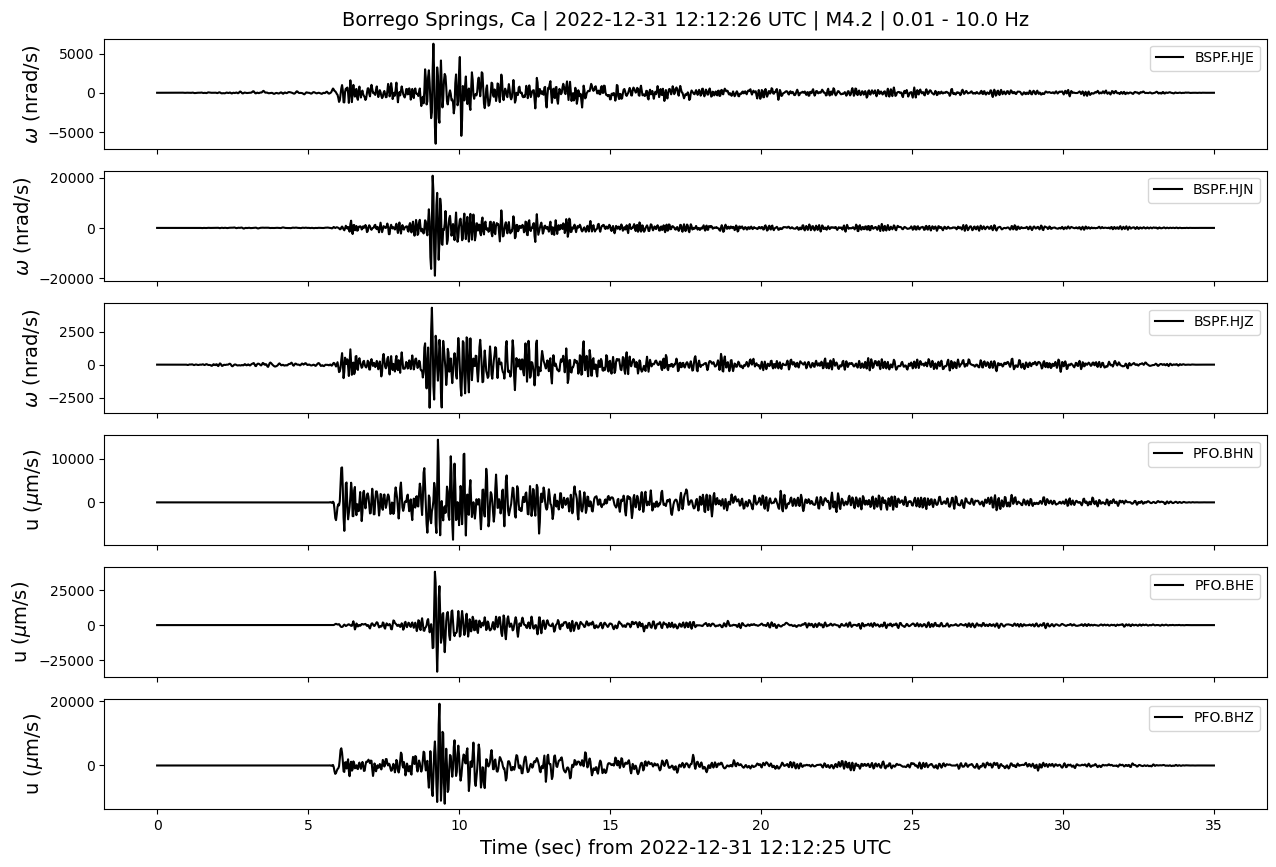

In [13]:
def __makeplot(config, st):

    fig, ax = plt.subplots(6,1, figsize=(15,10), sharex=True)

    font = 14

    time_scaling, time_unit = 1, "sec"
    rot_scaling = 1e9
    trans_scaling = 1e6
    
    for i, tr in enumerate(st):
        
        if i in [0,1,2]:
            ax[i].set_ylabel(r"$\omega$ (nrad/s)", fontsize=font)
            ax[i].plot(tr.times()/time_scaling, tr.data*rot_scaling, 'k', label=tr.stats.station+"."+tr.stats.channel)

        elif i in [3,4,5]:
            ax[i].set_ylabel(r"u ($\mu$m/s)", fontsize=font)
            ax[i].plot(tr.times()/time_scaling, tr.data*trans_scaling, 'k', label=tr.stats.station+"."+tr.stats.channel)
            
        ax[i].legend(loc=1)
        
    ax[5].set_xlabel(f"Time ({time_unit}) from {st[0].stats.starttime.date} {str(st[0].stats.starttime.time).split('.')[0]} UTC", fontsize=font)
    ax[0].set_title(config['title']+f" | {config['fmin']} - {config['fmax']} Hz", fontsize=font, pad=10)
    
    plt.show();
    return fig

fig = __makeplot(config, st_new)

In [14]:
# __savefig(fig, outpath="/home/andbro/Downloads/tmp/BSPF/", outname="BSPF_event_1", mode="png", dpi=300)

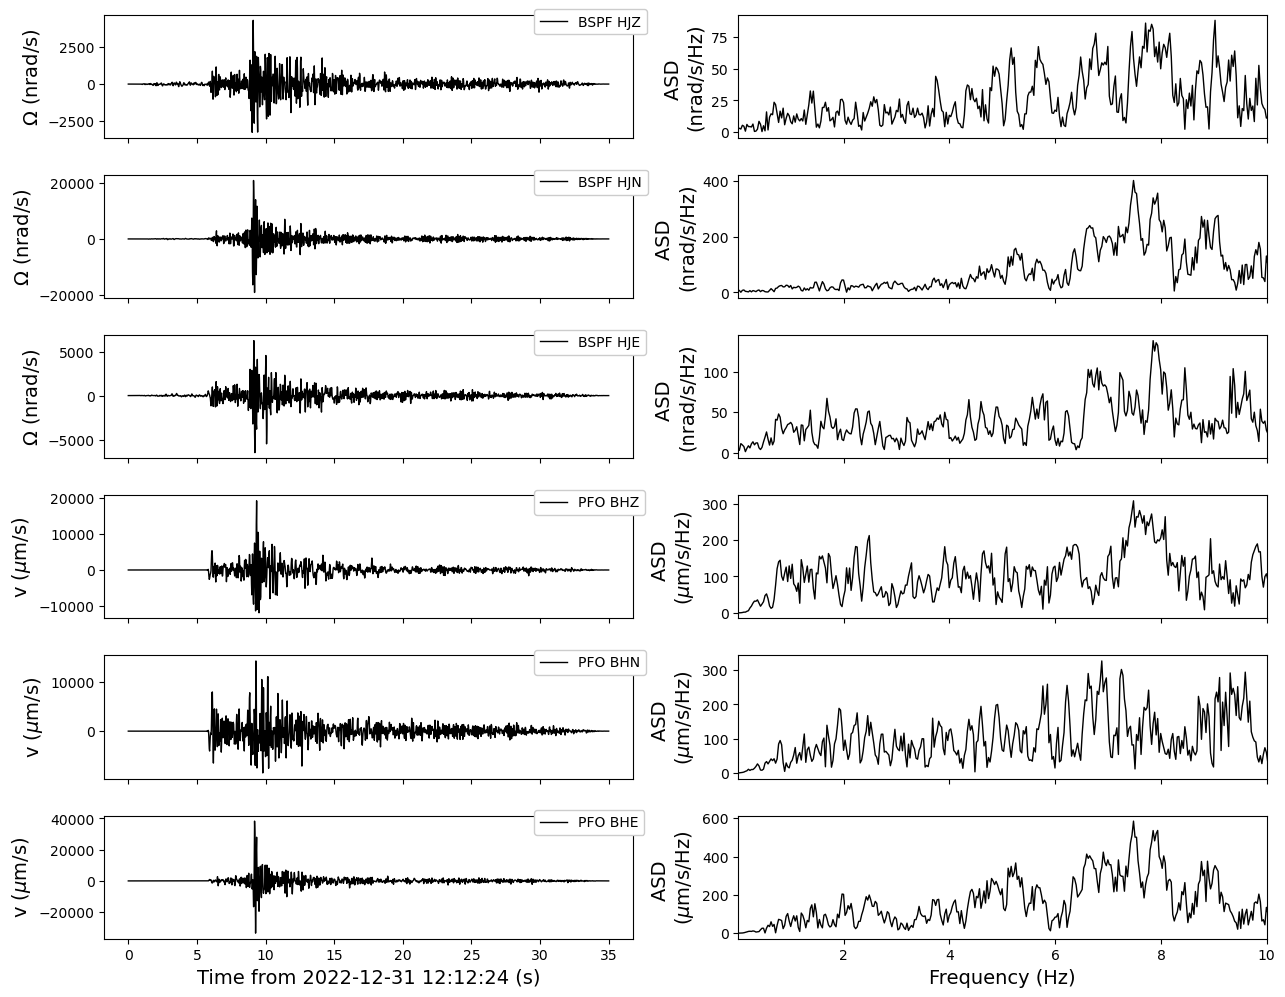

In [15]:
def __makeplotStreamSpectra2(st, config, fscale=None):

    from scipy import fftpack
    from andbro__fft import __fft
    import matplotlib.pyplot as plt

    NN = len(st)
    rot_scaling, rot_unit = 1e9, r"nrad/s"
    trans_scaling, trans_unit = 1e6, r"$\mu$m/s"
        
    fig, axes = plt.subplots(NN,2,figsize=(15,int(NN*2)), sharex='col')

    font = 14
    
    plt.subplots_adjust(hspace=0.3)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    for i, tr in enumerate(st):

#         comp_fft = abs(fftpack.fft(tr.data))
#         ff       = fftpack.fftfreq(comp_fft.size, d=1/tr.stats.sampling_rate)
#         comp_fft = fftpack.fftshift(comp_fft)
#         ff, spec = ff[1:len(ff)//2], abs(fftpack.fft(tr.data)[1:len(ff)//2])

        if tr.stats.channel[-2] == "J":
            scaling = rot_scaling
        elif tr.stats.channel[-2] == "H":
            scaling = trans_scaling

        spec, ff, ph = __fft(tr.data*scaling, tr.stats.delta, window=None, normalize=None)
    
    
        ## _________________________________________________________________
        if tr.stats.channel[-2] == "J":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*rot_scaling,
                        color='black',
                        label='{} {}'.format(tr.stats.station, tr.stats.channel),
                        lw=1.0,
                        )

        elif tr.stats.channel[-2] == "H":
            axes[i,0].plot(
                        tr.times(),
                        tr.data*trans_scaling,
                        color='black',
                        label='{} {}'.format(tr.stats.station, tr.stats.channel),
                        lw=1.0,
                        )
        ## _________________________________________________________________
        if fscale == "loglog":
            axes[i,1].loglog(ff, spec, color='black', lw=1.0)
        elif fscale == "loglin":
            axes[i,1].semilogx(ff, spec, color='black', lw=1.0)
        elif fscale == "linlog":
            axes[i,1].semilogy(ff, spec, color='black', lw=1.0)
        else:
            axes[i,1].plot(ff, spec, color='black', lw=1.0)         
        
        
        if tr.stats.channel[1] == "J":
            sym, unit = r"$\Omega$", rot_unit
        elif tr.stats.channel[1] == "H":
            sym, unit = "v", trans_unit
        else:
            unit = "Amplitude", "a.u."
            
        axes[i,0].set_ylabel(f'{sym} ({unit})',fontsize=font)    
        axes[i,1].set_ylabel(f'ASD \n({unit}/Hz)',fontsize=font)        
        axes[i,0].legend(loc='upper left',bbox_to_anchor=(0.8, 1.10), framealpha=1.0)
        
#         axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
#         axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

    if "fmin" in config.keys() and "fmax" in config.keys():
        axes[i,1].set_xlim(config['fmin'],config['fmax'])

    axes[NN-1,0].set_xlabel(f"Time from {tr.stats.starttime.date} {str(tr.stats.starttime.time)[:8]} (s)",fontsize=font)     
    axes[NN-1,1].set_xlabel(f"Frequency (Hz)",fontsize=font)     

    return fig

fig = __makeplotStreamSpectra2(st_new, config, fscale="linlin");

In [16]:
# __savefig(fig, outpath="/home/andbro/Downloads/tmp/BSPF/", outname="BSPF_ASD_event_1", mode="png", dpi=300)

## Load ADR 

In [17]:
# # datapath_adr = "/home/andbro/Downloads/tmp/BSPF/adr/*.mseed"

# # datapath_adr = "/home/andbro/kilauea-data/BSPF/202211/*.mseed"
# datapath_adr = "/home/andbro/Downloads/tmp/BSPF/202211/*.mseed"

# ## read data stream using obspy routine
# st_adr = obs.read( datapath_adr, 
#                    format="MSEED",
#                    startime=config['tbeg']-60,
#                    endtime=config['tend']+60,
#                  )

# # ## merge traces that might be split due to data gaps or overlaps
# st_adr.merge(fill_value="interpolate")

# # ## cut to event
# st_adr.trim(config['tbeg'], config['tend'])

# # ## remove mean
# st_adr.detrend("demean")

# # ## apply taper
# st_adr.taper(0.1)

# # ## renove sensitivity
# # st_adr.remove_sensitivity(config['inventory'])

# ## bandpass
# st_adr.filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=8, zerophase=True)


# # ## show all traces in data stream
# print(st_adr)

# st_adr.plot(equal_scale=False);

## Backazimuth

In [42]:
config['station_longitude'] = config['BSPF_lon']
config['station_latitude']  = config['BSPF_lat']

config['win_length_sec'] = .4  ## window length for correlation
config['step'] = 1
config['overlap'] = 80

earthquake name :  16km N of Borrego Springs, CA

Epicentral distance [m]:        24334.6
Theoretical azimuth [deg]:      346.3
Theoretical backazimuth [deg]:  166.3


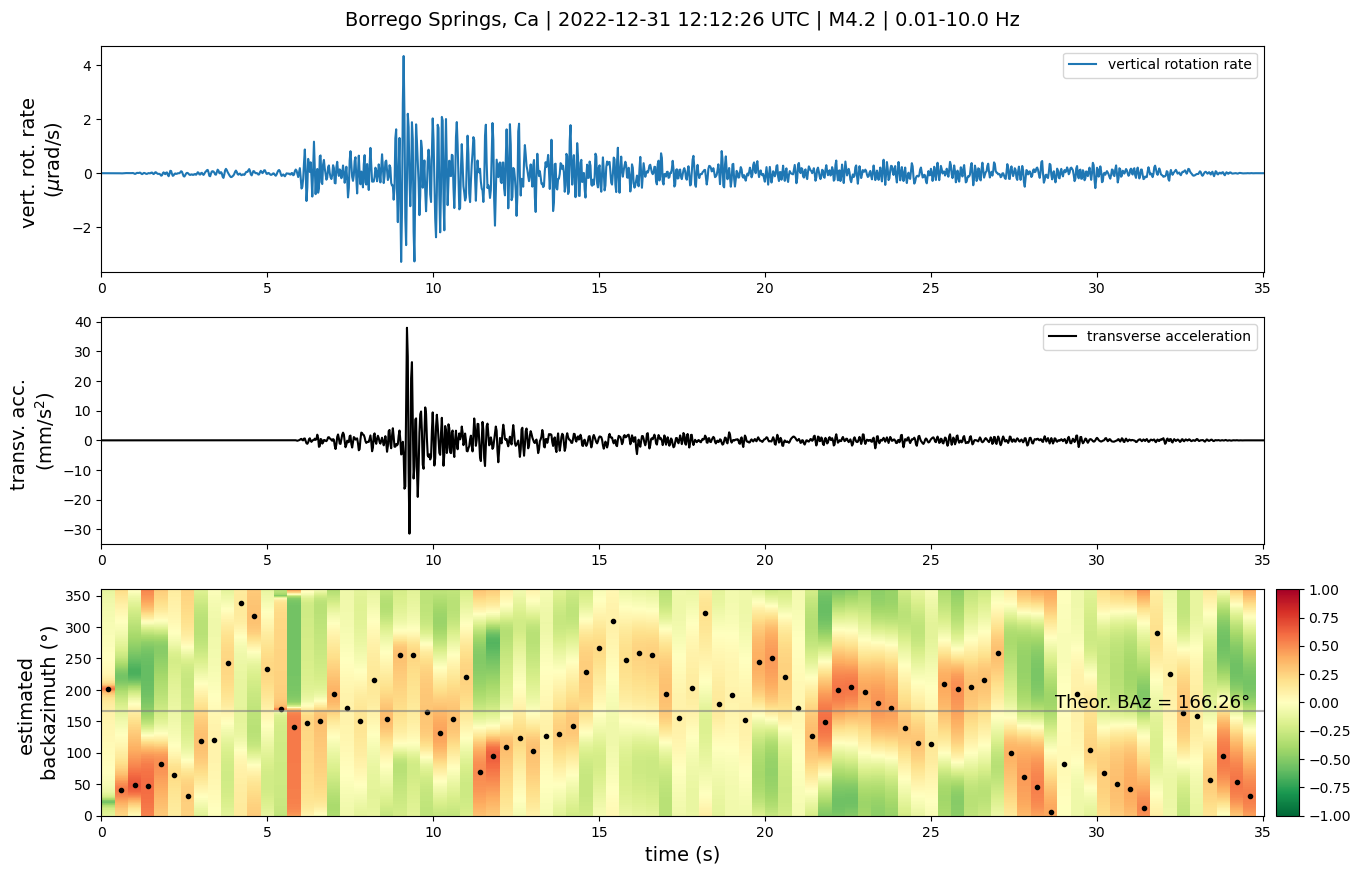

In [43]:
def __compute_backazimuth(st_acc, st_rot, config, event=None, plot=True):
    
    import numpy as np
    import matplotlib as mpl
    
    from obspy import read, read_events, UTCDateTime
    from obspy.clients.fdsn import Client
    from obspy.geodetics.base import gps2dist_azimuth
    from obspy.signal.cross_correlation import xcorr
    from obspy.signal.rotate import rotate_ne_rt

    ## _______________________________    
    ## check config
    keywords=['tbeg','tend','station_latitude', 'station_longitude',
              'step', 'win_length_sec', 'overlap', 'eventtime']

    for key in keywords: 
        if key not in config.keys():
            print(f" -> {key} is missing in config!\n")
            
            
    ## _______________________________    
    ## Defaults
    if 'win_length_sec' not in config.keys():
        config['win_length_sec'] = .5    ## window length for correlation
    if 'step' not in config.keys():
        config['step'] = 1
    if 'overlap' not in config.keys():
        config['overlap'] = 25
    
    
    ## time period
    config['tbeg'], config['tend'] = UTCDateTime(config['tbeg']), UTCDateTime(config['tend'])

    ## _______________________________    
    ## streams
    ACC = st_acc.trim(config['tbeg'], config['tend'])
    ROT = st_rot.trim(config['tbeg'], config['tend']).select(channel="*Z")
    
    ## _______________________________    
    ## get event if not provided
    if not event:
        events = Client("USGS").get_events(starttime=config['eventtime']-20, endtime=config['eventtime']+20)
        if len(events) > 1:
            print(f" -> {len(events)} events found!!!")
            print(events)
            
    event = events[0]
    
    ## event location from event info
    config['source_latitude'] = event.origins[0].latitude
    config['source_longitude'] = event.origins[0].longitude
    
    print(event.event_descriptions[0]['type'], ': ',event.event_descriptions[0]['text'] + "\n")
    

    ## _______________________________        
    ## theoretical backazimuth and distance
    
    config['baz'] = gps2dist_azimuth(
                                    config['source_latitude'], config['source_longitude'], 
                                    config['station_latitude'], config['station_longitude'],
                                    )

    print('Epicentral distance [m]:       ',np.round(config['baz'][0],1))
    print('Theoretical azimuth [deg]:     ', np.round(config['baz'][1],1))
    print('Theoretical backazimuth [deg]: ', np.round(config['baz'][2],1))

    ## _______________________________    
    ## backazimuth estimation
    
    config['sampling_rate'] = int(ROT.select(channel="*Z")[0].stats.sampling_rate)
    
    config['num_windows'] = len(ROT.select(channel="*Z")[0]) // (int(config['sampling_rate'] * config['win_length_sec']))

    
    backas = np.linspace(0, 360 - config['step'], int(360 / config['step']))
   
    corrbaz = []
    
    ind = None
    
    for i_deg in range(0, len(backas)):
        
        for i_win in range(0, config['num_windows']):
            
            ## infer indices
            idx1 = int(config['sampling_rate'] * config['win_length_sec'] * i_win)
            idx2 = int(config['sampling_rate'] * config['win_length_sec'] * (i_win + 1))
            
            ## add overlap
            if i_win > 0 and i_win < config['num_windows']:
                idx1 = int(idx1 - config['overlap']/100 * config['win_length_sec'] * config['sampling_rate'])
                idx2 = int(idx2 + config['overlap']/100 * config['win_length_sec'] * config['sampling_rate'])
                    
            ## rotate NE to RT   
            R, T = rotate_ne_rt(ACC.select(channel='*N')[0].data, 
                                ACC.select(channel='*E')[0].data,
                                backas[i_deg]
                               )
            
            ## compute correlation for backazimuth
            corrbaz0 = xcorr(ROT.select(channel="*Z")[0][idx1:idx2], 
                             T[idx1:idx2], 0,
                              )
            
            corrbaz.append(corrbaz0[1])

            
    corrbaz = np.asarray(corrbaz)
    corrbaz = corrbaz.reshape(len(backas), config['num_windows'])


    ## extract maxima
    maxcorr = np.array([backas[corrbaz[:, l1].argmax()] for l1 in range(0, config['num_windows'])])

    ## create mesh grid
    mesh = np.meshgrid(np.arange(config['win_length_sec']/2, config['win_length_sec'] * config['num_windows'], config['win_length_sec']), backas)

    

    ## _______________________________
    ## Plotting
    def __makeplot():
    
        ## get rotated acceleration
        R, T = rotate_ne_rt(ACC.select(component='N')[0].data, 
                            ACC.select(component='E')[0].data,
                            config['baz'][2]
                           )

        fig, ax = plt.subplots(3, 1, figsize=(15, 10))

        ## parameters
        font = 14
        acc_scaling, acc_unit = 1e3, "mm/s$^2$"
        rot_scaling, rot_unit = 1e6, "$\mu$rad/s"

        ## create time axis
        time = np.linspace(0, len(ACC[0].data)/ACC[0].stats.sampling_rate, len(ACC[0].data))

        ## plot vertical rotation rate
        ax[0].plot(time, ROT.select(channel="*Z")[0].data*rot_scaling, label='vertical rotation rate')

        ax[0].set_xlim(time[0], time[-1])
        ax[0].set_ylabel(f'vert. rot. rate \n({rot_unit})', fontsize=font)
        ax[0].legend()

        # add P- and S-wave arrivals
        ROT_max = max(ROT.select(channel="*Z")[0].data*rot_scaling)
        
        ## plot transverse acceleration
        ax[1].plot(time, T*acc_scaling, 'k',label='transverse acceleration')
        ax[1].set_xlim(time[0], time[-1])
        ax[1].set_ylabel(f'transv. acc. \n({acc_unit})', fontsize=font)
        ax[1].ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
        ax[1].legend()
        

        ## backazimuth estimation plot
        im = ax[2].pcolormesh(mesh[0], mesh[1], corrbaz, cmap=plt.cm.RdYlGn_r, vmin=-1, vmax=1, shading="auto")
        ax[2].set_xlim(time[0], time[-1])
        ax[2].set_ylim(0, 360)
        ax[2].set_ylabel(u'estimated \nbackazimuth (°)', fontsize=font)
        ax[2].set_xlabel('time (s)', fontsize=font)

        ## plot maximal correclation values
        ax[2].plot(np.arange(config['win_length_sec']/2., config['win_length_sec'] * len(maxcorr), config['win_length_sec']), maxcorr, '.k')

        ## plot theoretical Backazimuth for comparison
        xx = np.arange(0, config['win_length_sec'] * len(maxcorr) + 1, config['win_length_sec'])
        tba = np.ones(len(xx)) * config['baz'][2]
        if config['baz'][2] < 330:
            x_text, y_text = time[int(0.82*len(time))], config['baz'][2]+5
        else:
            x_text, y_text = time[int(0.82*len(time))], config['baz'][2]-15

        ax[2].plot(xx, tba, c='.5', lw=1.5, alpha=0.6)
        ax[2].text(x_text, y_text, u'Theor. BAz = '+str(round(config['baz'][2],2))+'°', color='k', fontsize=font-1)

        if 'fmin' in config.keys() and 'fmax' in config.keys():
            ax[0].set_title(config['title'] + f" | {config['fmin']}-{config['fmax']} Hz", pad=15, fontsize=font)
        else:
            ax[0].set_title(config['title'], pad=15, fontsize=font)
 
            
        ## add colorbar
    #     norm = mpl.colors.Normalize(vmin=-1, vmax=1)
    #     cb1 = mpl.colorbar.ColorbarBase(fig, cmap=plt.cm.RdYlGn_r, norm=norm, orientation='vertical')
        cax = ax[2].inset_axes([1.01, 0., 0.02, 1])
        cb1 = plt.colorbar(im, ax=ax[2], cax=cax)

        plt.show();
        return fig
    
    
    if plot:
        __makeplot();
        

    ## _______________________________
    ## prepare output        
    
    output = {}
    
    output['baz_mesh'] = mesh
    output['baz_corr'] = corrbaz
    output['baz_theo'] = config['baz']
    output['acc_transverse'] = T
    output['acc_radial'] = R
    output['rot_vertical'] = ROT.select(channel="*Z")
    output['event'] = event
    
    return output
        
out = __compute_backazimuth(ii_pfo, py_bspf, config, plot=True)   

In [ ]:
from obspy.clients.fdsn import Client

events = Client("USGS").get_events(starttime=config['eventtime']-60, endtime=config['eventtime']+60)

events